# Show plot of four days' glucose levels, plus their original images

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from pandas import DataFrame as DF, Series as Ser
from matplotlib import pyplot as plt

from date_time_string import date_time_string
import CGM_timestrings

In [2]:
def display_or_print(data):
    '''Use print() instead of display(), in particular if running this as a module'''
    import sys
    try:
        display(data)
    except Exception:
        print("demo-glucose-plotter: using print() instad of display().", file=sys.stderr)
        print(data)

In [3]:
def png_to_csv(screenshot_path):
    '''Read screenshot of CGM, convert to numpy array'''
    from PIL import Image
    png = np.asarray(Image.open(screenshot_path))
    return png

In [4]:
def date_with_hyphens(yyyymmdd):
    ''' insert hyphens in a date string of form yyyymmdd'''
    import re
    hyphenated = re.sub(r'^(\d{4})(\d{2})(\d{2})$', r'\1-\2-\3', str(yyyymmdd))
    assert (hyphenated != yyyymmdd), "date_with_hyphens(): Invalid date string"
    return hyphenated

In [5]:
path = "/Users/jonathan/site-packages/glucose_management/all-glucose-values.csv"
screenshot_paths = [
    "./images/processed/20240523-IMG_1970.PNG",
    "./images/processed/20240524-IMG_1969.PNG",
    "./images/processed/20240525-IMG_1968.PNG",
    "./images/processed/20240609-IMG_2048.PNG"
]
data = pd.read_csv(path)
#data.columns = ["Date" ] + ["C" + str(i+1) for i in range(data.shape[1]-1)]
data.columns = ["Date"] + CGM_timestrings.main()
pd.set_option('display.max_rows', 6)
display_or_print(data)
pd.options.display.max_rows=None

,Date,000000,000011,000022,000033,000044,000055,000006,000017,000028,...,232320,232331,232342,232353,232304,232315,232326,232337,232348,242400
0,20240329,127,127,127,127,128,128,128,128,128,...,118,117,117,118,118,118,119,120,120,120
1,20240330,121,121,121,122,122,122,122,122,123,...,124,124,125,125,126,126,127,127,127,128
2,20240331,128,128,128,127,127,126,126,125,125,...,116,117,118,118,118,118,117,117,117,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,20240915,109,109,108,107,108,107,107,107,107,...,129,127,126,126,125,124,123,122,121,121
154,20240916,117,117,116,115,114,115,115,115,115,...,140,140,140,140,140,139,139,139,138,138
155,20240917,135,134,134,133,132,131,130,130,129,...,117,120,122,125,128,133,136,138,140,142


In [6]:
# Eventually, get start/end dates from user; create slice of data using the dates' indices
start_date, end_date = 20240523, 20240525 # ignore last date; need function to get these dates

data_dates = list(data["Date"])

start_index, end_index = (data_dates.index(start_date), \
        data_dates.index(end_date) + 1) # add 1 or iloc won't include last row
data_slice = pd.concat([data.iloc[start_index:end_index, :], 
                        DF(data.iloc[-1, :]).T]).copy()

data_2 = DF(data_slice.iloc[:, 1:])
data_2t = data_2.T
hours_even = ["12 AM"] + [str(i) + " AM" for i in range(2, 12, 2)] + \
    ["12 PM"] + [str(i) + " PM" for i in range(2, 12, 2)] + ["12 AM"]

print("Dates:", list(data_slice["Date"]))
display_or_print(data_2t.iloc[[0, 1, -2, -1], :])

Dates: [20240523, 20240524, 20240525, 20240917]


,50,51,52,155
000000,126,133,127,135
000011,126,131,127,134
232348,141,126,152,140
242400,139,126,152,142


,030330,030341,030352,030304,030315,030326,030337,030348,030359,030310,...,040404,040415,040426,040437,040448,040459,040410,040421,050532,050543
51,145,144,143,141,139,137,136,136,136,137,...,168,166,165,165,164,163,161,157,153,151


110 139
111 140
112 142
113 144
114 147
115 150
116 152
117 154
118 156
119 158
120 161
121 163
122 165
123 167
124 168
125 169
126 169
127 169
128 169
129 169
130 168
131 166
132 165
133 165
134 164
135 163
136 161
137 157
138 153
139 151
140 150


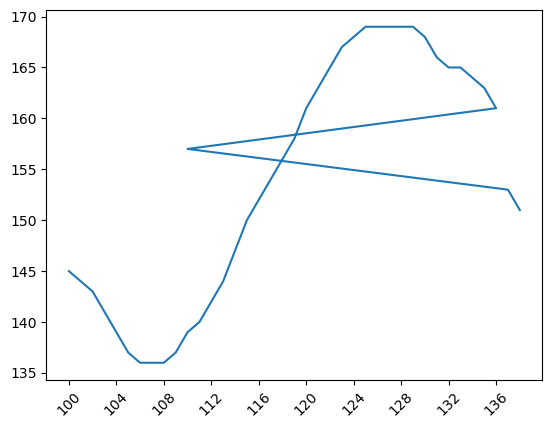

In [7]:
pd.options.display.max_rows=None
display(data_2.iloc[1:2, 100:140])
for i in range(110, 141):
    j = int(data_2.iloc[1:2, i].iloc[0])
    print(i, j)
#plt.plot(data_2.T.iloc[:141,:])
fig, ax = plt.subplots()
ax.plot(data_2.iloc[1, 100:140])
ax.set_xticks(np.arange(0, 40, 4), labels=np.arange(100, 140, 4), rotation=45)
plt.show()

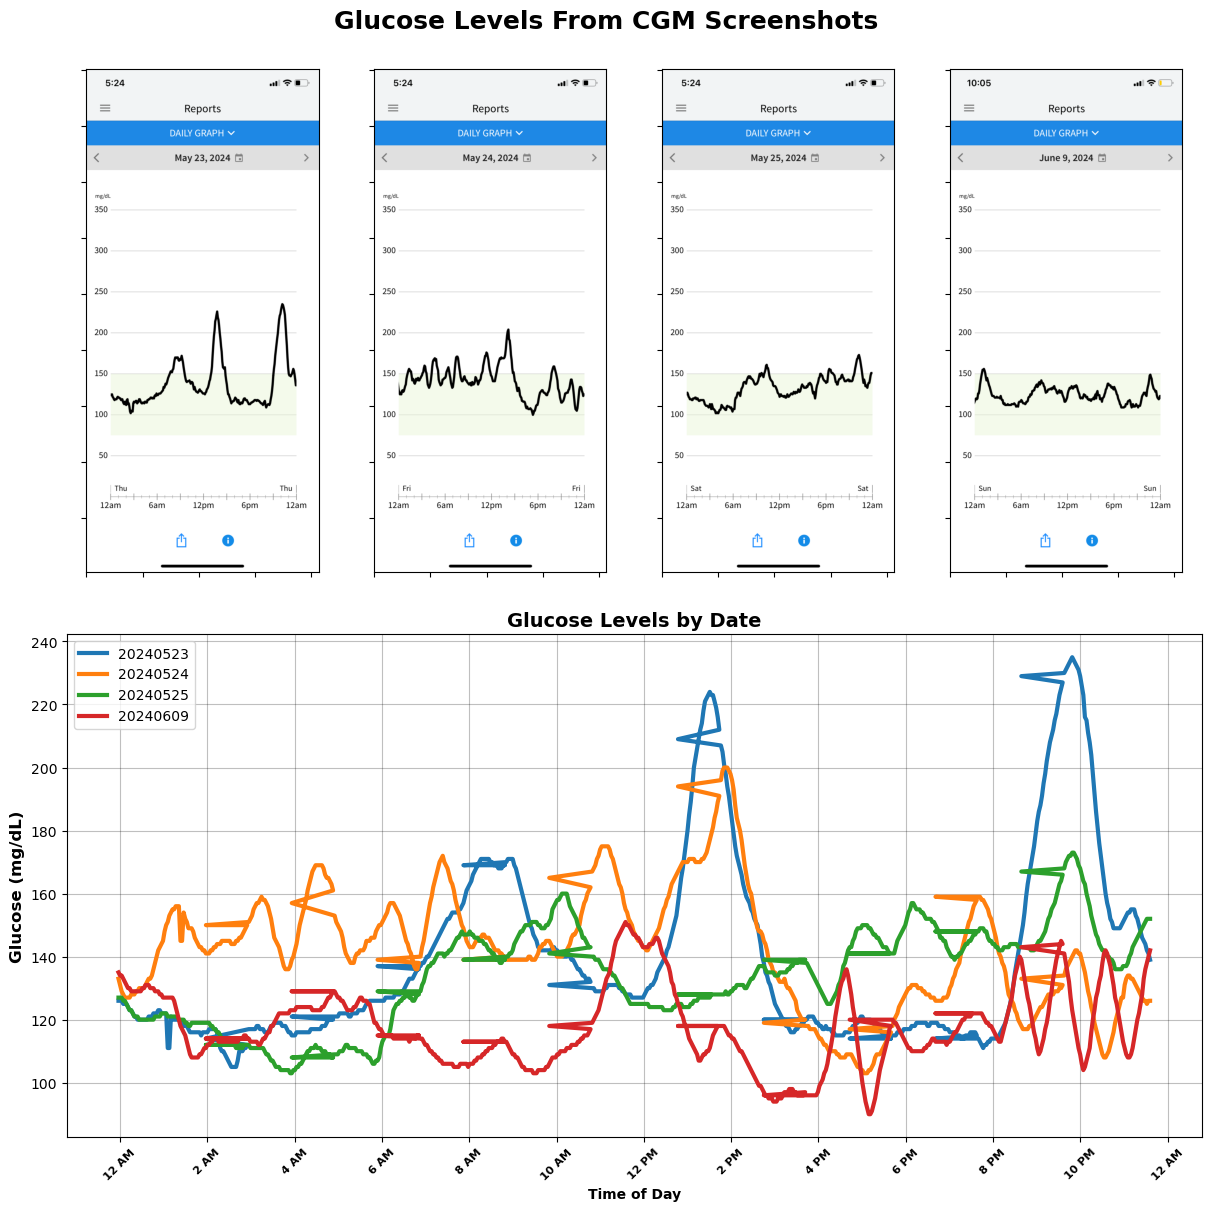

In [8]:
# Use GridSpec:
# Modified from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/
# gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import imshow
'''
class matplotlib.gridspec.GridSpec(nrows, ncols, figure=None, left=None, 
bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, 
height_ratios=None)

matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, 
interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, 
interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, 
url=None, data=None, **kwargs)
'''

def show_grid_items(fig):
    for i, ax in enumerate(fig.axes):
        if (i, ax) == (4, ax5):
            ax.plot(data_2t, linewidth=3)
            ax.legend(['20240523', '20240524', '20240525', '20240609'])
            ax.grid(color='black', alpha=0.25)
            ax.set_xticks(ticks=np.linspace(1, 660, len(hours_even)), labels=hours_even,
              fontsize=8, fontweight='bold', rotation=45)
            ax.set_xlabel("Time of Day", fontweight='bold', fontsize=10)
            ax.set_ylabel("Glucose (mg/dL)", fontweight='bold', fontsize=12)
            ax.set_title("\nGlucose Levels by Date", fontsize=14, fontweight='bold')
#            ax.set_title("\nCollected Glucose Values, " + date_with_hyphens(start_date) + \
#                 " — " + date_with_hyphens(end_date), fontsize=14, fontweight='bold')

        else:
            ax.imshow(png_to_csv(screenshot_paths[i]))
            ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(figsize=(12, 12), layout="constrained")
gs = GridSpec(2, 4, figure=fig)

fig.suptitle("Glucose Levels From CGM Screenshots\n",
                            fontweight='bold', fontsize=18)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, :])

show_grid_items(fig)
dts = date_time_string()
plt.savefig("Screenshots-plotted-" + dts + ".png")
plt.show()